In [79]:
import pandas as pd
import numpy as np
import numbers
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
### Определим значение наших столбцов
####  `date` - дата публикации объявления;
####  `time` - время публикаци объявления;
####  `geo_lat` - значение координаты (широта);
####  `geo_lo` - значение координаты (долгота);
####  `region` - код региона РФ;
####  `building_type` - Тип здания. 0 - Прочее. 1 - Панельный дом. 2 - Монолит. 3 - Кирпичный. 4 - Блочный. 5 - Деревянный;
####  `object_type` - Тип квартиры. 1 - Вторичное жилье; 11 - Новая квартира в новостройке;
####  `level` - Этаж, на котором находится квартира;
####  `levels` - Количество этажей;
####  `rooms` - Количество жилых комнат. Если значение -1 - это значит, что квартира является "студией";
####  `area` - Совокупная площадь квартиры;
####  `kitchen_area` - Площадь кухни;
####  `price` - Цена в рублях РФ.

In [80]:
pd.set_option('display.max_columns', None, 'display.width', -1)
estate_df = pd.read_csv('russian_estate.csv')
estate_df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


#### Смотрим какие данные есть в датасете

In [81]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


#### Среднее значение, количество и дисперсия

In [82]:
estate_df.describe().round(2)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00,5477006.00
mean,4.422029e+06,54.04,53.24,4307.14,1.95,6.21,11.40,1.73,53.92,10.63,3.95
std,2.150752e+07,4.62,20.75,3308.05,1.04,4.96,6.54,1.08,33.35,9.79,4.56
min,-2.144967e+09,41.46,19.89,3.00,0.00,1.00,1.00,-2.00,0.07,0.01,1.00
25%,1.950000e+06,53.38,37.78,2661.00,1.00,2.00,5.00,1.00,38.00,7.00,1.00
50%,2.990000e+06,55.17,43.07,2922.00,2.00,5.00,10.00,2.00,48.02,9.70,1.00
75%,4.802000e+06,56.23,65.65,6171.00,3.00,9.00,16.00,2.00,63.13,12.70,11.00
max,2.147484e+09,71.98,162.54,61888.00,5.00,39.00,39.00,10.00,7856.00,9999.00,11.00


# Предобработка данных


#### Нулевых и NaN значений в датасете нет

In [83]:
# colours = ['#993366', '#FFFF00']
# sns.heatmap(estate_df.isnull(), cmap=sns.color_palette(colours))
# # Decorations
# plt.title('Матрица пропущенных значений набора данных', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
# plt.show()

In [84]:
estate_df.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [85]:
estate_df.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

#### Удаляем дубликаты

In [109]:
estate_df.duplicated().sum()

1520

1520

In [110]:
estate_df = estate_df.drop_duplicates()
estate_df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000.0,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000.0,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000.0,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000.0,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000.0,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760.0,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160.0,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000.0,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910.0,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


#### Удаляем нулевые значения у цены

In [87]:
df_pred_nullprice = estate_df[estate_df['price'] == 0.0].index
estate_df = estate_df.drop(df_pred_nullprice, axis=0)

In [88]:
estate_df.shape

(5476983, 13)

# Преобразование данных


#### price: int -> float

In [89]:
estate_df["price"] = estate_df["price"].astype(float)

#### Преобразуем отрицательные price, rooms

In [90]:
estate_df["price"].min()

-2144967296.0

In [91]:
estate_df["price"] = estate_df["price"].abs()

In [92]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5476983 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          float64
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 585.0+ MB


In [93]:
estate_df["rooms"].min()

-2

In [94]:
estate_df["rooms"] = estate_df["rooms"].abs()

# Анализ данных


# Работа с выбросами


#### Area выбросы

In [95]:
estate_df['area'].describe().round(2)

count    5476983.00
mean          53.92
std           33.35
min            0.07
25%           38.00
50%           48.02
75%           63.13
max         7856.00
Name: area, dtype: float64

<AxesSubplot: >

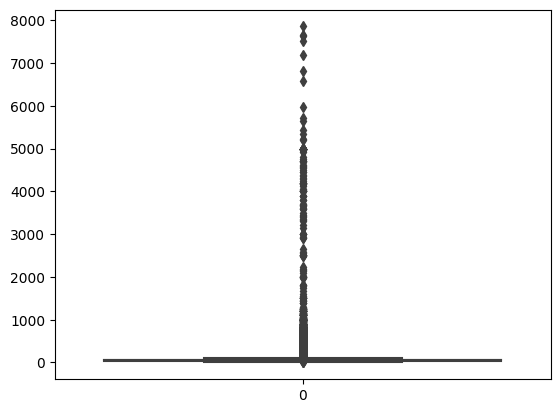

In [96]:
sns.boxplot(estate_df['area'])

In [97]:
q_low = estate_df['area'].quantile(0.01)       # Удалим нижний и верхний выбросы в столбце "Площадь", объединив условие с оператором AND:
q_hi  = estate_df['area'].quantile(0.99)

estate_df = estate_df[(estate_df['area'] < q_hi) & (estate_df['area'] > q_low)]

In [98]:
estate_df['area'].describe().round(2)

count    5364087.00
mean          52.77
std           19.57
min           19.86
25%           38.50
50%           48.02
75%           63.00
max          138.19
Name: area, dtype: float64

#### Price выбросы

In [99]:
estate_df.price.describe().round(2)

count    5.364087e+06
mean     4.386433e+06
std      2.078056e+07
min      1.000000e+00
25%      1.950000e+06
50%      2.980000e+06
75%      4.777500e+06
max      2.147484e+09
Name: price, dtype: float64

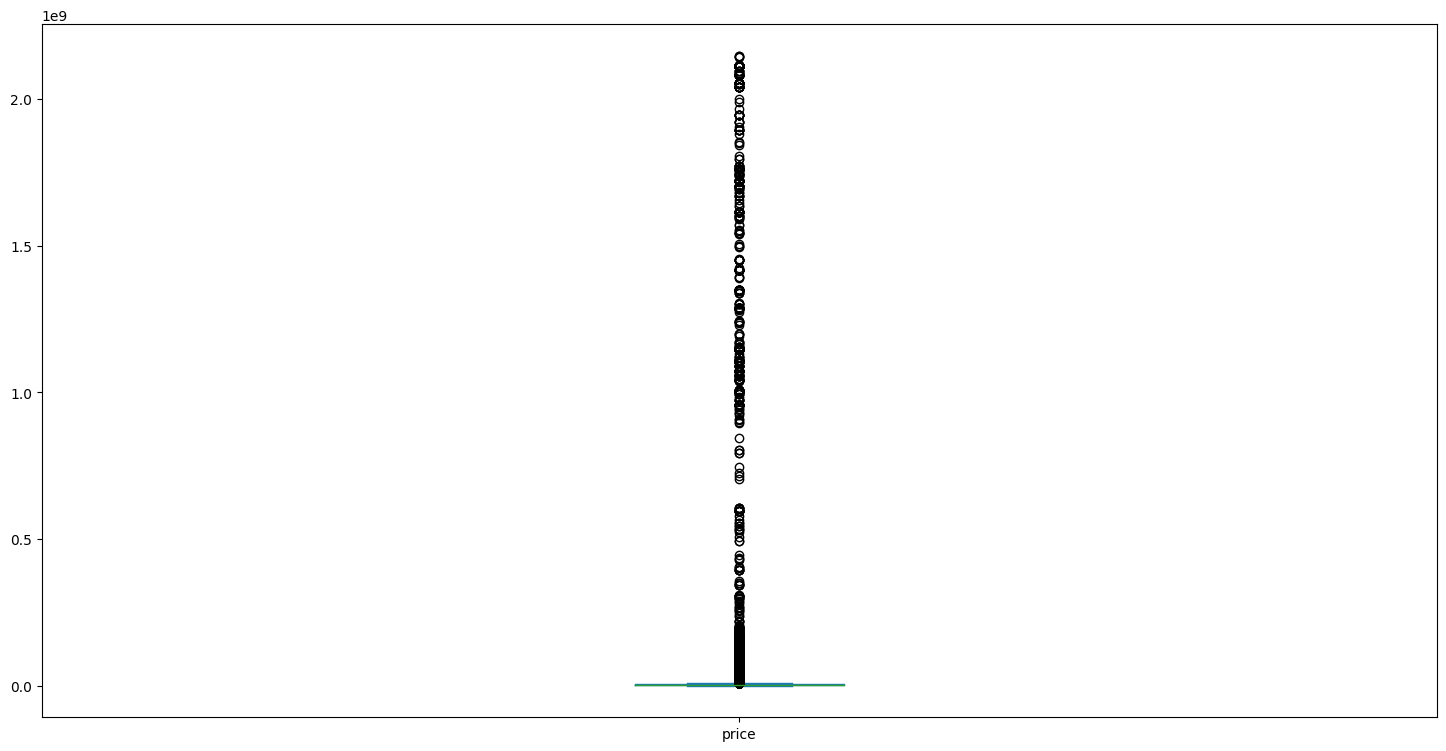

In [100]:

plt.figure(figsize=(18,9))            # Наблюдаем очень большое количество выбросов в столбце 'price'
estate_df.price.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [101]:
q_low = estate_df["price"].quantile(0.01)
q_hi  = estate_df["price"].quantile(0.99)

estate_df = estate_df[(estate_df["price"] < q_hi) & (estate_df["price"] > q_low)]

In [102]:
estate_df["price"].describe().round(2)

count     5256490.00
mean      3895970.07
std       2943321.97
min        770777.00
25%       1952280.00
50%       2980000.00
75%       4700000.00
max      20121509.00
Name: price, dtype: float64

In [103]:
estate_df["kitchen_area"].describe().round(2)            # Наблюдаем наличие очень маленьких и больших значений в столбце "Площадь кухни", которые вероятно тоже являются выбросами

count    5256490.00
mean          10.49
std            8.62
min            0.01
25%            7.00
50%            9.70
75%           12.45
max         9999.00
Name: kitchen_area, dtype: float64

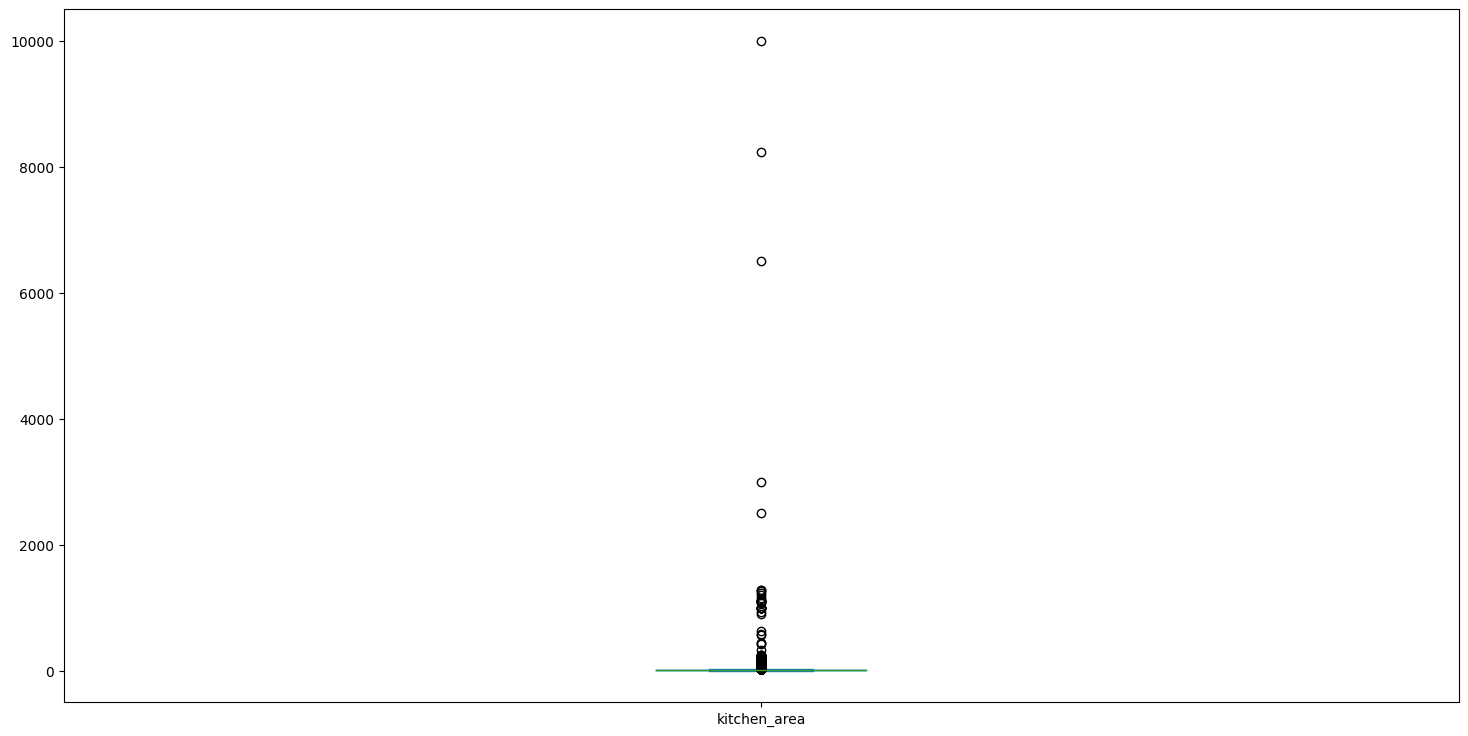

In [104]:
plt.figure(figsize=(18,9))            # Наблюдаем очень большое количество выбросов в столбце 'price'
estate_df.kitchen_area.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [106]:
q_low = estate_df["kitchen_area"].quantile(0.01)       # Удалим нижний и верхний выбросы в столбце "Площадь кухни", объединив условие с оператором AND:
q_hi  = estate_df["kitchen_area"].quantile(0.99)

estate_df = estate_df[(estate_df["kitchen_area"] < q_hi) & (estate_df["kitchen_area"] > q_low)]

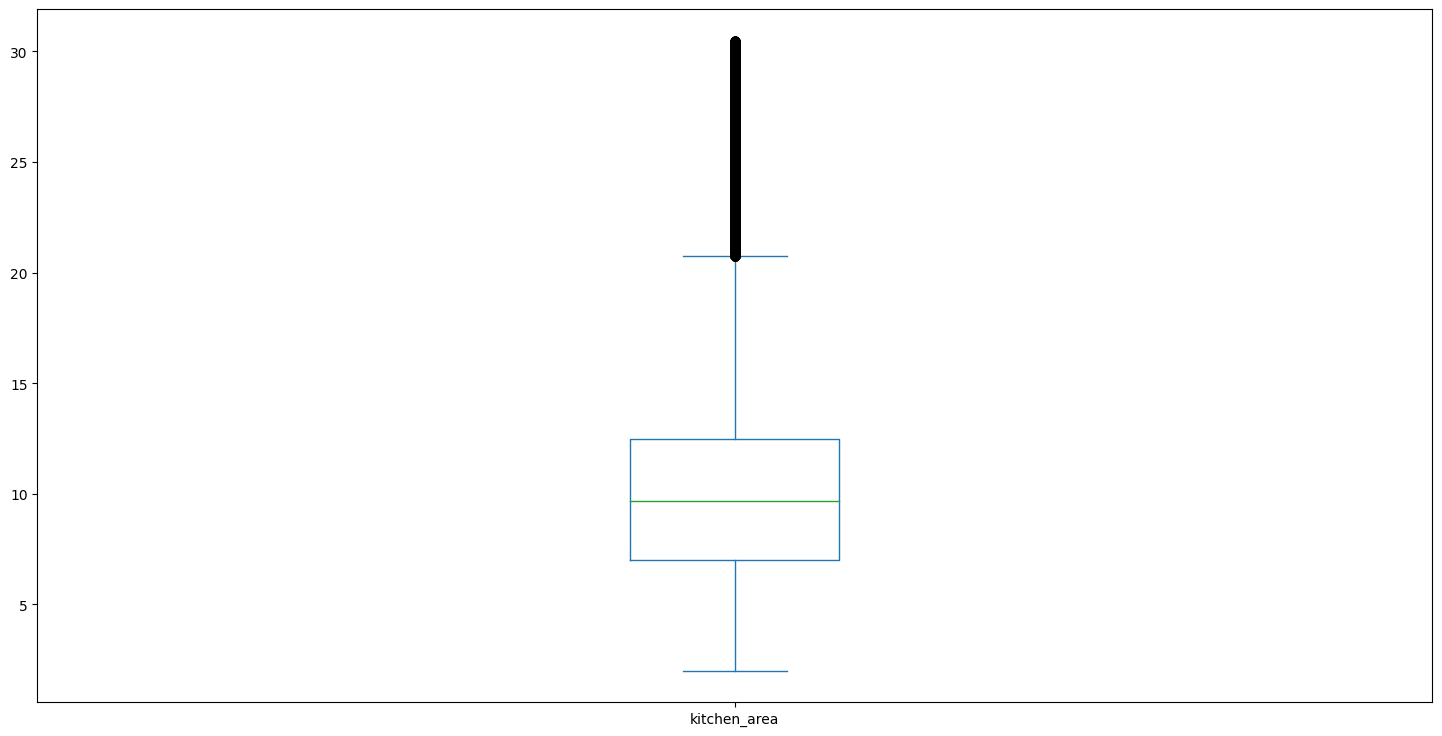

In [107]:
plt.figure(figsize=(18,9))            # Наблюдаем очень большое количество выбросов в столбце 'price'
estate_df.kitchen_area.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# Модели


# Сравнение моделей по метрикам
